## Question 1.

Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
import os

In [ ]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [ ]:
det = chardet.detect(open('../../_data/data_dengue_peru.csv', 'rb').read())
charenc = det['encoding']

In [ ]:
main_data = pd.read_csv('../../_data/data_dengue_peru.csv', encoding=charenc, low_memory=False)

## Question 2.

Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.

In [ ]:
main_data["Ubigeo_String"] = main_data["Ubigeo"].astype(str)

main_data["Ubigeo_Largo"] = main_data["Ubigeo_String"].str.len()

In [ ]:
df5 = main_data[main_data["Ubigeo_Largo"] == 5]
df5["Ubigeo_String"] = df5["Ubigeo_String"].str.zfill(6)

In [ ]:
df6 = main_data[main_data["Ubigeo_Largo"] == 6]

In [ ]:
new_data = pd.concat([df5, df6])

In [ ]:
new_data["Ubigeo_Departamento"] = new_data["Ubigeo_String"].str[0:2]
new_data["Ubigeo_Provincia"] = new_data["Ubigeo_String"].str[0:4]

In [ ]:
new_data_2021= new_data[new_data["Año"] == 2021]
new_data_2021.Casos = new_data_2021.Casos.fillna(0).replace(',', '', regex=True).astype(int)
new_data.Casos = new_data.Casos.fillna(0).replace(',', '', regex=True).astype(int)

## Question 3.

Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

In [ ]:
dist_2021_dengue = new_data_2021.groupby( ['Ubigeo_String'], as_index = False )[['Casos']] \
                            .sum()

In [ ]:
dist_2021_dengue = dist_2021_dengue.rename(columns={'Ubigeo_String': 'UBIGEO'})


In [ ]:
maps = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

In [ ]:
maps = maps[['UBIGEO', 'geometry']]
maps['UBIGEO'] = maps['UBIGEO']


In [ ]:
map_dist = maps.merge(dist_2021_dengue, how="outer", on="UBIGEO")
map_dist

<Axes: >

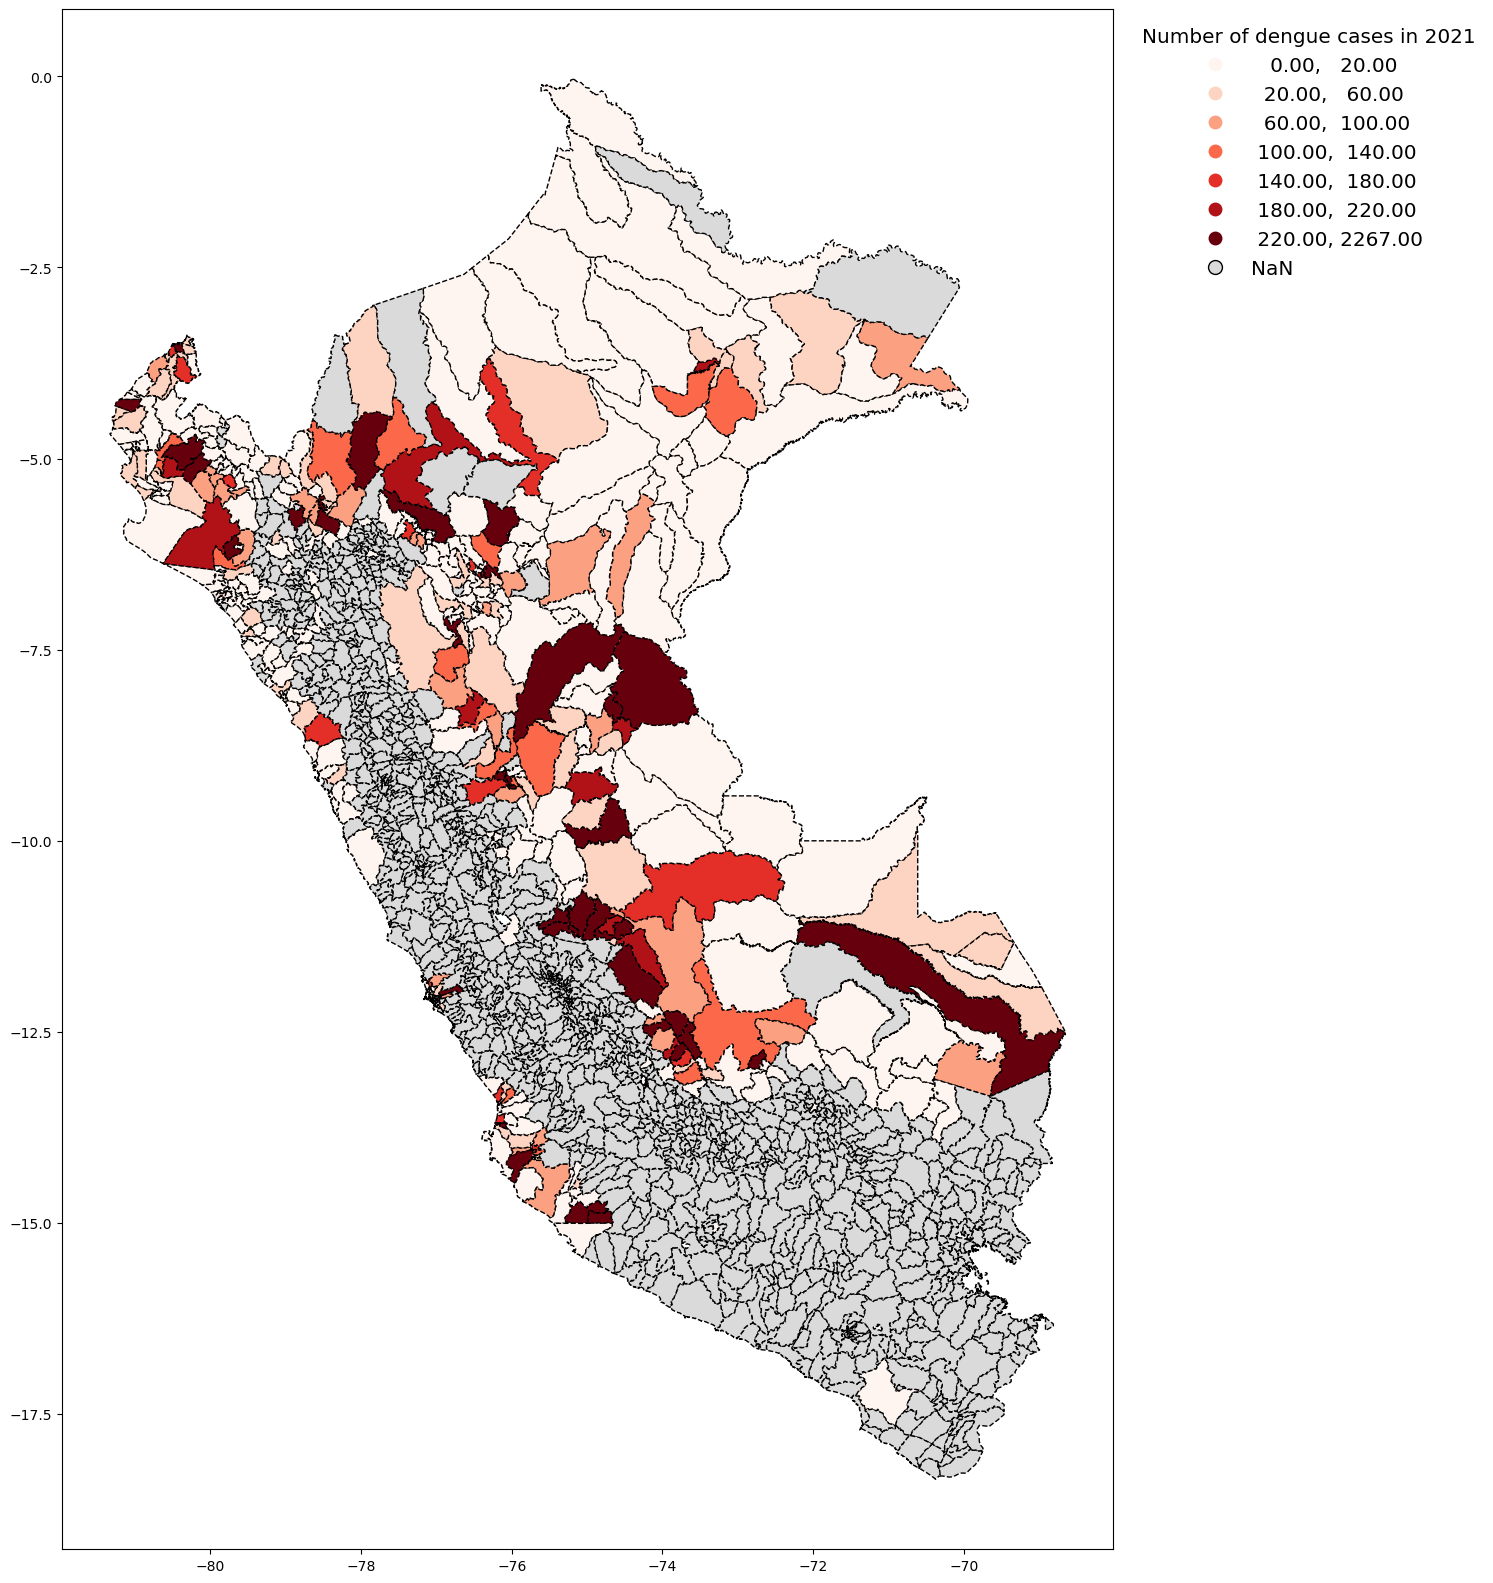

In [29]:
map_dist.plot( column='Casos', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True,
              scheme = "User_Defined", 
          missing_kwds= dict(color = "#DADADB",), 
          classification_kwds = dict( bins = [ 20, 60, 100, 140, 180, 220] ), 
          legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of dengue cases in 2021", 
                            title_fontsize = 'x-large', 
                            frameon= False ) )

## Question 4.

Use geopandas to plot the number of cases in 2021by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.

In [ ]:
prov_2021_dengue = new_data_2021.groupby( ['Ubigeo_Provincia'], as_index = False )[['Casos']]\
  .sum()

In [ ]:
maps2 = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

In [ ]:
maps2["Ubigeo_Provincia"] = maps2["UBIGEO"].str[0:4]

In [ ]:
maps2 = maps2[['Ubigeo_Provincia', 'geometry']]

In [ ]:
map_prov = maps2.merge(prov_2021_dengue, how="outer", on="Ubigeo_Provincia")

In [ ]:
map_prov.plot( column='Casos', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True,
              scheme = "User_Defined", 
          missing_kwds= dict(color = "#DADADB",), 
          classification_kwds = dict( bins = [ 500, 1000, 1500, 2000] ), 
          legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of dengue cases in 2021", 
                            title_fontsize = 'x-large', 
                            frameon= False )          )

## Question 5.

Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.

In [139]:
new_data

Año  Semana Eventos o daños   Departamento       Distrito  \
0       2020      43          Dengue          CUSCO      MEGANTONI   
3       2020       1          Dengue          CUSCO      MEGANTONI   
4       2020      53          Dengue          CUSCO      MEGANTONI   
5       2020      47          Dengue          CUSCO      MEGANTONI   
15      2019       1          Dengue          CUSCO      MEGANTONI   
...      ...     ...             ...            ...            ...   
172139  2021      49          Dengue  MADRE DE DIOS  MADRE DE DIOS   
172140  2021      49          Dengue  MADRE DE DIOS      TAHUAMANU   
172141  2021      50          Dengue  MADRE DE DIOS  MADRE DE DIOS   
172142  2021      50          Dengue  MADRE DE DIOS      TAHUAMANU   
172143  2021      51          Dengue  MADRE DE DIOS      TAHUAMANU   

            Provincia  Ubigeo  Casos Ubigeo_String  Ubigeo_Largo  \
0       LA CONVENCION   80914      2        080914             5   
3       LA CONVENCION   80914      0        080914             5   
4       LA CONVENCION   80914      2        080914             5   
5       LA CONVENCION   80914      7        080914             5   
15      LA CONVENCION   80914      0        080914             5   
...               ...     ...    ...           ...           ...   
172139           MANU  170203      0        170203             6   
172140      TAHUAMANU  170303      0        170303             6   
172141           MANU  170203      0        170203             6   
172142      TAHUAMANU  170303      0        170303             6   
172143      TAHUAMANU  170303      0        170303             6   

       Ubigeo_Departamento Ubigeo_Provincia  
0                       08             0809  
3                       08             0809  
4                       08             0809  
5                       08             0809  
15                      08             0809  
...                    ...              ...  
172139                  17             1702  
172140                  17             1703  
172141                  17             1702  
172142                  17             1703  
172143                  17             1703  

[172144 rows x 12 columns]

In [142]:
# We create a subset retaining only columns of interest
dep_data_año = new_data[ [ 'Departamento', 'Casos', 'Año' ] ]
#dep_data_anio = dep_data_anio.groupby(dep_data_anio['Año'])['Casos'].sum(numeric_only=True)
#dep_data_anio = dep_data_anio.groupby( [ 'Departamento', 'Año' ] ).sum().reset_index()
#dep_data_anio = dep_data_anio.rename( columns = { 'Departamento': 'Ubigeo_Departamento' } )


In [153]:
dep_data_dengue = dep_data_año.groupby(dep_data_año['Año'])['Casos'].sum()
dep_data_dengue

Año
2015    35817
2016    25160
2017    68290
2018     4698
2019    15290
2020    56103
2021    36196
Name: Casos, dtype: int32

In [146]:
dep_shp = gpd.read_file( r'../../_data/INEI_LIMITE_DEPARTAMENTAL/INEI_LIMITE_DEPARTAMENTAL.shp' )
dep_shp = dep_shp[ [ 'NOMBDEP', 'geometry' ] ]
dep_shp = dep_shp.rename(columns={'NOMBDEP': 'Departamento'})
#dep_shp = dep_shp.reset_index()
#dep_shp = dep_shp.dissolve( by = 'Ubigeo_Dep', aggfunc='sum' )

In [163]:
# We merge the department data with the departaments shapefile

bd_años = dep_shp.merge( dep_data_año, how = 'outer', on = 'Departamento' )
bd_años.Año = bd_años.Año.fillna(0).replace(',', '', regex=True).astype(int)
bd_años.Casos = bd_años.Casos.fillna(0).replace(',', '', regex=True).astype(int)
bd_años

Departamento                                           geometry  Casos  \
0          AMAZONAS  POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...      0   
1          AMAZONAS  POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...      0   
2          AMAZONAS  POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...      0   
3          AMAZONAS  POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...      0   
4          AMAZONAS  POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...      0   
...             ...                                                ...    ...   
172143      UCAYALI  POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...      0   
172144      UCAYALI  POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...      0   
172145      UCAYALI  POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...      0   
172146      UCAYALI  POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...      0   
172147      UCAYALI  POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...      0   

         Año  
0       2021  
1       2021  
2       2021  
3       2021  
4       2021  
...      ...  
172143  2019  
172144  2019  
172145  2019  
172146  2019  
172147  2019  

[172148 rows x 4 columns]

In [162]:
bd_años.groupby(bd_años['Año'])['Casos'].sum() 
#compramos que se mantenga el mismo #casos antes de hacer el merge

Año
0           0
2015    35817
2016    25160
2017    68290
2018     4698
2019    15290
2020    56103
2021    36196
Name: Casos, dtype: int32

In [ ]:
fig, axis = plt.subplots( nrows = 3, ncols= 3, figsize = ( 15, 15 ) )

idx = 0
for i in range( 3 ):
    for j in range ( 3 ):
              
        ax = axis[ i ][ j ]
        Año = bd_años.Año.unique()[ idx ]
        df6 = bd_años[ bd_años.Año == Año ]
        df6.plot( column='Casos', 
                  cmap='Reds', 
                  linestyle='--',
                  edgecolor='black', 
                  legend = True, 
                  ax = ax 
                )
        
        ax.set_title( Año )
        
        idx = idx + 1

In [39]:
#bd_anios_m = bd_anios[bd_anios["Año"].isna()==True]

In [40]:
#bd_anios_m.loc[bd_anios_m.index.repeat(7)].reset_index(drop=True)

## Question 6.

Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.

In [ ]:
# First we define a function to get the quarters based on weeks

def get_quarter(week):
    if week <= 13:
        return 'Q1'
    elif week <= 26:
        return 'Q2'
    elif week <= 39:
        return 'Q3'
    else:
        return 'Q4'

In [ ]:
# We apply this function using the lambda function
new_data_2021['quarters'] = new_data_2021['Semana'].apply(lambda x: get_quarter(x))

In [ ]:
# We verify the number of quarters
new_data_2021[ 'quarters' ].value_counts()

In [ ]:
# We create a subset retaining only columns of interest
dep_data = new_data_2021[ [ 'Departamento', 'Casos', 'quarters' ] ]
dep_data = dep_data.groupby( [ 'Departamento', 'quarters' ] ).sum().reset_index()
dep_data = dep_data.rename( columns = { 'Departamento': 'NOMBDEP' } )
dep_data

In [ ]:
# We read and retain columns of interest from the shapefile. Then we group by region ussing dissolve function

dist_shp = gpd.read_file( r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp' )
dist_shp = dist_shp[ [ 'NOMBDEP', 'geometry' ] ]
dep_shp = dist_shp.dissolve( by = 'NOMBDEP', aggfunc='sum' )
dep_shp = dep_shp.reset_index()
dep_shp

In [ ]:
# We merge the department data with the departaments shapefie

dep_final = dep_data.merge( dep_shp, how = 'outer', on = 'NOMBDEP' )
dep_final

In [ ]:
# Group the data by department
grouped = dep_final.groupby('NOMBDEP')

# Define a function to check for missing quarters and reindex the group
def add_missing_quarters(group):
    quarters = ['Q1', 'Q2', 'Q3', 'Q4']
    missing_quarters = list(set(quarters) - set(group.quarters))
    if len(missing_quarters) > 0:
        missing_data = pd.DataFrame({
            'NOMBDEP': group.NOMBDEP.iloc[0],
            'quarters': missing_quarters,
            'Casos': None,
            'geometry': group.geometry.iloc[0]
        })
        group = pd.concat([group, missing_data])
    return group

# Apply the function to each group
df = grouped.apply(add_missing_quarters)

# Reset the index of the dataframe and drop missings in the quarters column
df = df.reset_index(drop=True)
df = df.dropna( subset = 'quarters' )
df

In [ ]:
# We convert out pandas dataframe to a geopandas dataframe

from geopandas import GeoDataFrame
df = GeoDataFrame(df)
df

In [ ]:
# We plot 

fig, axes = plt.subplots( nrows=2, ncols=2, figsize=(12, 12 ))
axes = axes.flatten()

# loop over the quarters and plot the number of cases by department for each quarter
quarters = df['quarters'].unique()
for i, quarter in enumerate(quarters):
    # filter the dataset to only include data for the current quarter
    gdf_quarter = df[df['quarters'] == quarter]
    
    # plot the number of cases by department
    ax = gdf_quarter.plot( column='Casos', 
                           ax=axes[ i ], 
                           cmap='YlOrRd', 
                           legend = True,
                           linestyle='--',
                           edgecolor='black', 
                           missing_kwds={ 'color': 'lightgrey' },
                           classification_kwds = dict( bins = [ 400, 800, 1200, 1600, 2000 ] )
                         )
    
    ax.set_title(quarter)
    ax.set_axis_off()
    
# adjust the layout and spacing of the subplots
plt.tight_layout()
plt.subplots_adjust(hspace=0.05, wspace=0.05)

# show the plot
plt.show()